In [44]:
#importing basic libraries
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [45]:
np.random.seed(42)

In [46]:
mushrooms = pd.read_csv('homework5_input_data.csv')
mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [47]:
mushrooms.columns


Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [48]:
Y = mushrooms['class']

In [49]:
mushroom_class = mushrooms['class']
mushroom_numeric = mushrooms
mushroom_numeric.drop(['class'], axis=1)
mushrooms_numeric = pd.get_dummies(mushrooms, columns= mushrooms.columns, prefix = mushrooms.columns)
mushrooms_numeric['class'] = mushroom_class
mushrooms_numeric.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,p
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,e
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,e
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,p
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,e


In [50]:
mushrooms_numeric.columns

Index(['class_e', 'class_p', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f',
       'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'cap-surface_f',
       'cap-surface_g',
       ...
       'population_v', 'population_y', 'habitat_d', 'habitat_g', 'habitat_l',
       'habitat_m', 'habitat_p', 'habitat_u', 'habitat_w', 'class'],
      dtype='object', length=120)

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(mushrooms_numeric[['cap-shape_b', 'cap-shape_c', 'cap-shape_f',
       'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'cap-surface_f',
       'cap-surface_g',
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w']], mushrooms_numeric['class_p'], test_size=0.2, random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((6499, 18), (6499,), (1625, 18), (1625,))

In [52]:

model = DecisionTreeClassifier(random_state=0)

# we can first score our model through cross validation (applicable to any supervised model we learn)
cross_val_score(model, X_train, Y_train, cv=5)

array([0.84692308, 0.84153846, 0.84307692, 0.86230769, 0.83756736])

In [53]:
model.fit(X_train, Y_train)

print('Accuracy of linear SVC on training set: {:.2f}'.format(model.score(X_train, Y_train)))

print('Accuracy of linear SVC on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy of linear SVC on training set: 0.85
Accuracy of linear SVC on test set: 0.84


In [66]:
mushroom_features = ['cap-shape_b', 'cap-shape_c', 'cap-shape_f',
       'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'cap-surface_f',
       'cap-surface_g',
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w']
mushroom_target = ['p','e']


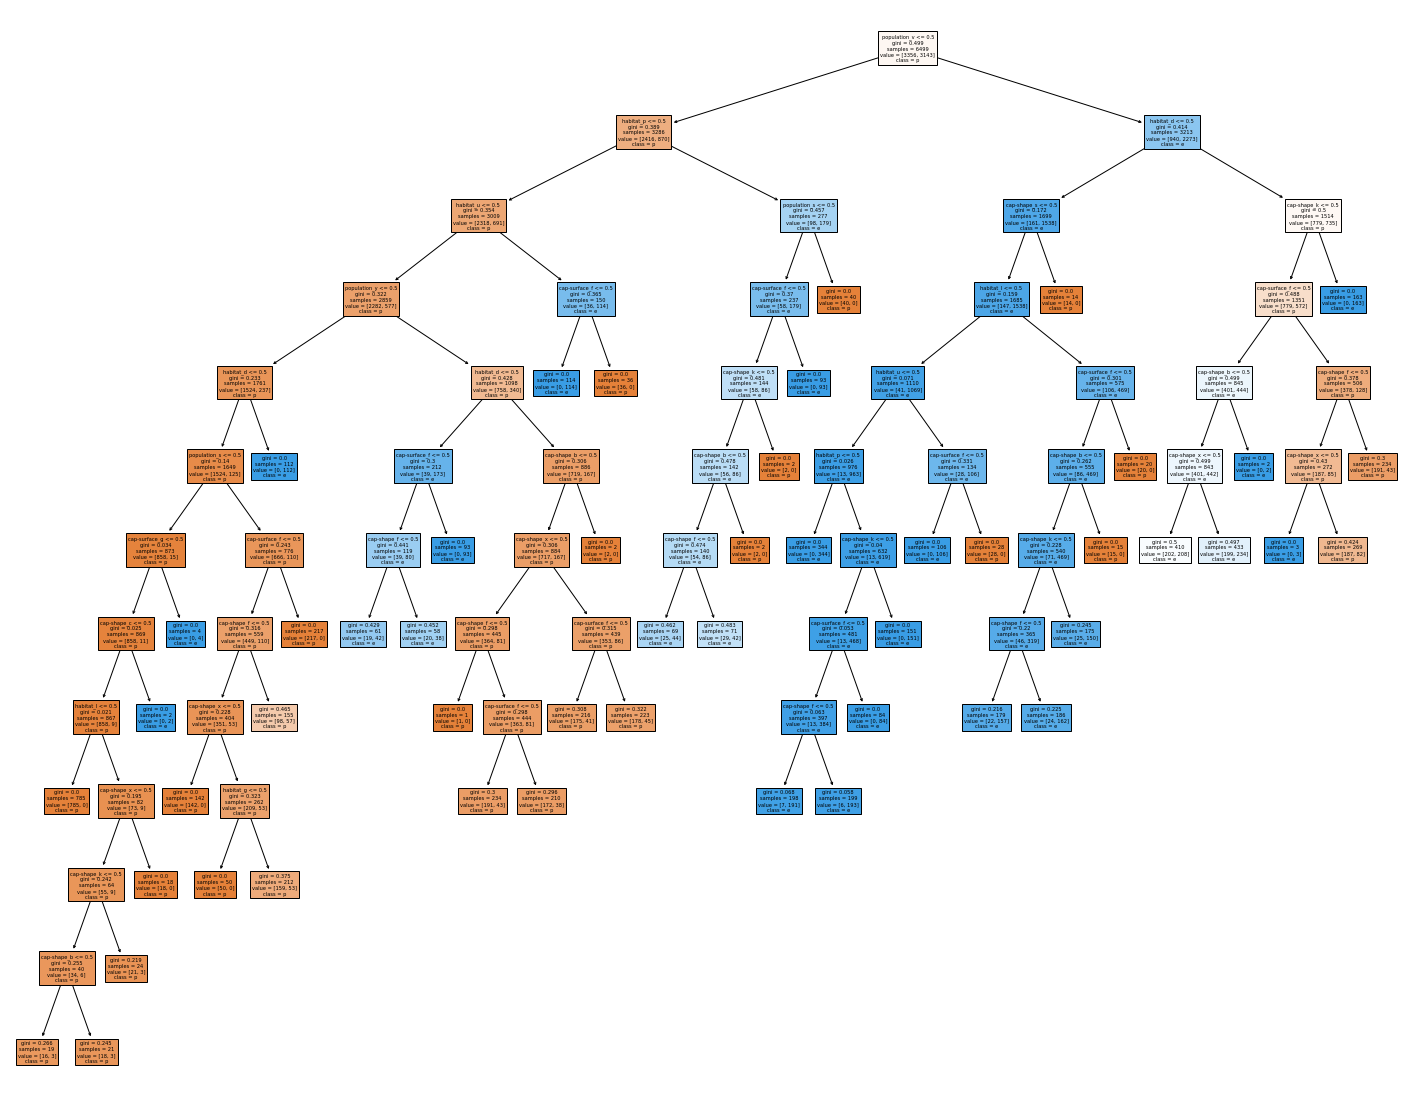

In [67]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, feature_names=mushroom_features, class_names=mushroom_target, filled=True)


Confusion matrix, without normalization
[[698 154]
 [114 659]]
Normalized confusion matrix
[[0.82 0.18]
 [0.15 0.85]]


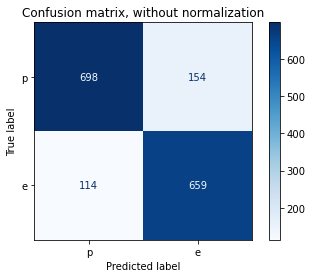

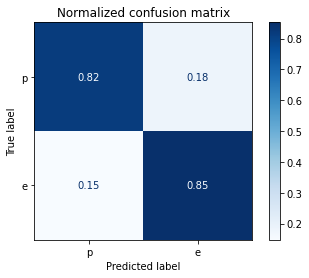

In [69]:
np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels=mushroom_target,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [70]:
model = RandomForestClassifier(max_depth=2, random_state=0)
cross_val_score(model, X_train, Y_train, cv=5)

array([0.77, 0.75, 0.76, 0.78, 0.75])

In [71]:
model.fit(X_train, Y_train)
print('Accuracy of linear SVC on training set: {:.2f}'.format(model.score(X_train, Y_train)))
print('Accuracy of linear SVC on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy of linear SVC on training set: 0.76
Accuracy of linear SVC on test set: 0.76


Confusion matrix, without normalization
[[680 172]
 [224 549]]
Normalized confusion matrix
[[0.8  0.2 ]
 [0.29 0.71]]


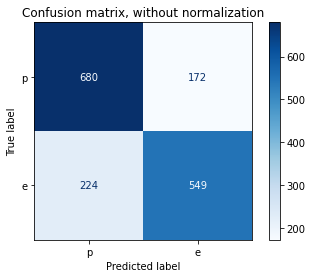

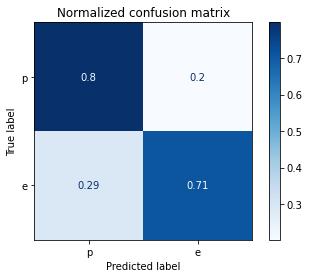

In [73]:
np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels=mushroom_target,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()